 **ОПРЕДЕЛЕНИЕ ПЕРСПЕКТИВНОГО ТАРИФА ДЛЯ ТЕЛЕКОМ-КОМПАНИИ**


 
**Описание проекта**

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо предварительно проанализировать тарифы на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Необходимо проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

* Тариф «Смарт» 

Ежемесячная плата: 550 рублей

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля

1 Гб интернет-трафика: 200 рублей

* Тариф «Ультра»

Ежемесячная плата: 1950 рублей

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль

1 Гб интернет-трафика: 150 рублей

**Примечание**
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

**Цель исследования**

* Описать поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.

* Проверить гипотезы

1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Ход исследования**  

Исследование содержит следующие этапы:
1. Изучение данных из файлов.  
2. Предобработка данных.  
    * 2.1 Обработка типов данных
    * 2.2 Обработка дубликатов  
3. Подготовка пользовательских данных
3. Исследовательский анализ данных.
4. Проверка гипотез.
5. Общий вывод.

## Изучение данных из файла

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats as st
from datetime import datetime


In [2]:
# чтение файла calls.csv и сохранение в переменной calls
if os.path.exists('/datasets/calls.csv'):
    calls = pd.read_csv('/datasets/calls.csv', sep = ',')
else:
    calls = pd.read_csv('calls.csv', sep = ',')

In [3]:
# чтение файла internet.csv и сохранение в переменной internet
if os.path.exists('/datasets/internet.csv'):
    internet = pd.read_csv('/datasets/internet.csv', sep = ',', index_col=0)
else:
    internet = pd.read_csv('internet.csv', sep = ',', index_col=0)

In [4]:
# чтение файла messages.csv и сохранение в переменной messages
if os.path.exists('/datasets/messages.csv'):
    messages = pd.read_csv('/datasets/messages.csv', sep = ',')
else:
    messages = pd.read_csv('messages.csv', sep = ',')

In [5]:
# чтение файла tariffs.csv и сохранение в переменной tariffs
if os.path.exists('/datasets/tariffs.csv'):
    tariffs = pd.read_csv('/datasets/tariffs.csv', sep = ',')
else:
    tariffs = pd.read_csv('tariffs.csv', sep = ',')

In [6]:
# чтение файла users.csv и сохранение в переменной users
if os.path.exists('/datasets/users.csv'):
    users = pd.read_csv('/datasets/users.csv', sep = ',')
else:
    users = pd.read_csv('users.csv', sep = ',')

In [7]:
# просмотр первых пяти строк таблицы calls
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [8]:
# получение общей информации о данных в таблице calls
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В таблице 4 столбцов.

Согласно документации к данным:
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

In [9]:
# посмотрим на столбец 'duration' в таблице calls при помощи describe
calls['duration'].describe() 

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

Длительность звонков в пределах нормы. Среднее с медианой имеют не большие различия.

In [10]:
# просмотр первых пяти строк таблицы internet
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [11]:
# получение общей информации о данных в таблице internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


В таблице 4 столбцов.

Согласно документации к данным:
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

In [12]:
# посмотрим на столбец 'mb_used' в таблице internet при помощи describe
internet['mb_used'].describe() 

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

Все значения в пределах нормы.

In [13]:
# просмотр первых пяти строк таблицы messages
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [14]:
# получение общей информации о данных в таблице messages
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице 3 столбцов.

Согласно документации к данным:
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

In [15]:
# просмотр таблицы tariffs
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [16]:
# получение общей информации о данных в таблице tariffs
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В таблице 8 столбцов.

Согласно документации к данным:
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


In [17]:
# переведем объём интернет-трафика в гигабайты
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included']/1024
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


In [18]:
# просмотр первых пяти строк таблицы второй таблицы users
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [19]:
# получение общей информации о данных в таблице users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В таблице 8 столбцов.

Согласно документации к данным:
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом 
* city — город проживания пользователя
* tariff — название тарифного плана

In [20]:
# посмотрим на столбец 'age' в таблице users при помощи describe
users['age'].describe() 

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

Аномалий в возрасте не наблюдается.

### Вывод
* Во всех таблицах пропусков нет. В таблице users в столбце churn_date, если значение пропущено, это значит, что тариф ещё действовал на момент выгрузки данных. 
* Во всех таблицах, столбцы с датами имеют тип object, его необходимо заменит на datetime.

##  Предобработка данных

### Обработка типов данных

In [21]:
# заменяем тип данных на datetime в столбце с датами во всех таблицах
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d %H:%M:%S')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d %H:%M:%S')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d %H:%M:%S')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d %H:%M:%S')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d %H:%M:%S')

In [22]:
# проверим правильно ли изменился тип данных у столбцов с датами
for i in calls, internet, messages, users:
    i.info()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB

<class 'pandas.core.fr

### Обработка дубликатов

In [23]:
#посмотрим с помощью метода duplicated(), есть ли явные дубликаты в таблицах с данными
for df in calls, internet, messages, users:
    print(df.duplicated().sum())
    print()

0

0

0

0



In [24]:
# проверим на наличие дубликатов столбца с user_id в таблице users
users['user_id'].duplicated().sum()

0

In [25]:
# посмотрим все уникальные значения в столбце 'city'
users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

### Вывод
* Тип данных в столбцах с датами изменен.
* Просмотрев данные на наличие дубликатов, убедились в их отсутствии.

## Подготовка пользовательских данных

In [26]:
# выделим в отдельный столбец месяц и год из столбца 'call_date' для таблицы calls
calls['month'] = calls['call_date'].values.astype('datetime64[M]')
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,2018-07-01
1,1000_1,2018-08-17,0.00,1000,2018-08-01
2,1000_2,2018-06-11,2.85,1000,2018-06-01
3,1000_3,2018-09-21,13.80,1000,2018-09-01
4,1000_4,2018-12-15,5.18,1000,2018-12-01


In [27]:
# «Мегалайн» всегда округляет секунды до минут, поэтому
# округлим длительность звонков и изменим тип данных на целочисленный
calls['duration'] = np.ceil(calls['duration']).astype('int')

In [28]:
# соберем сводную таблицу для каждого пользователя по месяцам и посчитаем количество сделанных звонков и израсходованных минут разговора 
df_calls = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum']).reset_index()
df_calls.columns = ['user_id', 'month', 'call_count', 'call_sum']
df_calls.head(10)

,user_id,month,call_count,call_sum
0,1000,2018-05-01,22,159
1,1000,2018-06-01,43,172
2,1000,2018-07-01,47,340
3,1000,2018-08-01,52,408
4,1000,2018-09-01,58,466
5,1000,2018-10-01,57,350
6,1000,2018-11-01,43,338
7,1000,2018-12-01,46,333
8,1001,2018-11-01,59,430
9,1001,2018-12-01,63,414


In [29]:
# выделим в отдельный столбец месяц и год из столбца 'message_date' для таблицы messages
messages['month'] = messages['message_date'].values.astype('datetime64[M]')
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,2018-06-01
1,1000_1,2018-10-08,1000,2018-10-01
2,1000_2,2018-08-04,1000,2018-08-01
3,1000_3,2018-06-16,1000,2018-06-01
4,1000_4,2018-12-05,1000,2018-12-01


In [30]:
# соберем сводную таблицу для каждого пользователя по месяцам и посчитаем количество отправленных сообщений 
df_messages = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
df_messages.columns = ['user_id', 'month', 'messages_count']
df_messages.head(10)

,user_id,month,messages_count
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57
5,1000,2018-10-01,73
6,1000,2018-11-01,58
7,1000,2018-12-01,70
8,1002,2018-06-01,4
9,1002,2018-07-01,11


In [31]:
# выделим в отдельный столбец месяц из столбца 'session_date' для таблицы internet
internet['month'] = internet['session_date'].values.astype('datetime64[M]')
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,2018-11-01
1,1000_1,1052.81,2018-09-07,1000,2018-09-01
2,1000_2,1197.26,2018-06-25,1000,2018-06-01
3,1000_3,550.27,2018-08-22,1000,2018-08-01
4,1000_4,302.56,2018-09-24,1000,2018-09-01


In [32]:
# соберем сводную таблицу для каждого пользователя по месяцам и посчитаем объем израсходованного интернет-трафика
df_internet = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
df_internet.columns = ['user_id', 'month', 'mb_sum_inet']
# переведем столбец с мегабайтами в гигабайты  
df_internet['mb_sum_inet'] = df_internet['mb_sum_inet']/1024
df_internet.head(10)

,user_id,month,mb_sum_inet
0,1000,2018-05-01,2.200674
1,1000,2018-06-01,22.689229
2,1000,2018-07-01,13.675430
3,1000,2018-08-01,13.726494
4,1000,2018-09-01,14.227451
5,1000,2018-10-01,14.357900
6,1000,2018-11-01,14.410615
7,1000,2018-12-01,9.587510
8,1001,2018-11-01,17.997402
9,1001,2018-12-01,13.707676


In [33]:
# «Мегалайн» всегда округляет мегабайты — до гигабайт, поэтому
# округлим объем интернет-трафика и изменим тип данных на целочисленный
df_internet['mb_sum_inet'] = np.ceil(df_internet['mb_sum_inet']).astype('int')
df_internet.head()

,user_id,month,mb_sum_inet
0,1000,2018-05-01,3
1,1000,2018-06-01,23
2,1000,2018-07-01,14
3,1000,2018-08-01,14
4,1000,2018-09-01,15


In [34]:
# объединим таблицы df_calls и df_messages для дальнейшего расчета выручки с каждого пользователя
revenue = df_calls.merge(df_messages, on=['user_id', 'month'], how='outer')

In [35]:
# посмотрим первые 5 строк объединенной таблицы
revenue.head()

,user_id,month,call_count,call_sum,messages_count
0,1000,2018-05-01,22.0,159.0,22.0
1,1000,2018-06-01,43.0,172.0,60.0
2,1000,2018-07-01,47.0,340.0,75.0
3,1000,2018-08-01,52.0,408.0,81.0
4,1000,2018-09-01,58.0,466.0,57.0


In [36]:
# объединим, ранее полученную таблицу revenue с df_internet для дальнейшего расчета выручки с каждого пользователя
revenue = revenue.merge(df_internet, on=['user_id', 'month'], how='outer')

In [37]:
# посмотрим первые 5 строк объединенной таблицы
revenue.head(10)

,user_id,month,call_count,call_sum,messages_count,mb_sum_inet
0,1000,2018-05-01,22.0,159.0,22.0,3.0
1,1000,2018-06-01,43.0,172.0,60.0,23.0
2,1000,2018-07-01,47.0,340.0,75.0,14.0
3,1000,2018-08-01,52.0,408.0,81.0,14.0
4,1000,2018-09-01,58.0,466.0,57.0,15.0
5,1000,2018-10-01,57.0,350.0,73.0,15.0
6,1000,2018-11-01,43.0,338.0,58.0,15.0
7,1000,2018-12-01,46.0,333.0,70.0,10.0
8,1001,2018-11-01,59.0,430.0,NaN,18.0
9,1001,2018-12-01,63.0,414.0,NaN,14.0


In [38]:
# посмотрим в получившейся таблице, процент пропущенных значений
(revenue.isna().mean().round(4))*100

user_id            0.00
month              0.00
call_count         1.24
call_sum           1.24
messages_count    15.46
mb_sum_inet        0.34
dtype: float64

Судя по пропускам, не все абоненты предпочитают вид связи через смс. Остальные пропуски по звонкам и интернету, составляют менее 2%, с ними ничего делать не будем.

In [39]:
# Добавляем необходимые столбцы с данными для расчета выручки
revenue = revenue.merge(users[['user_id', 'tariff', 'city']], on='user_id', how='left')
revenue.head()

,user_id,month,call_count,call_sum,messages_count,mb_sum_inet,tariff,city
0,1000,2018-05-01,22.0,159.0,22.0,3.0,ultra,Краснодар
1,1000,2018-06-01,43.0,172.0,60.0,23.0,ultra,Краснодар
2,1000,2018-07-01,47.0,340.0,75.0,14.0,ultra,Краснодар
3,1000,2018-08-01,52.0,408.0,81.0,14.0,ultra,Краснодар
4,1000,2018-09-01,58.0,466.0,57.0,15.0,ultra,Краснодар


In [40]:
# заменим все пропуски на ноль
columns = ['call_sum', 'messages_count', 'mb_sum_inet']
for column in columns: revenue[column] = revenue[column].fillna(0)

In [41]:
# расчитаем выручку для каждого клиента при помощи функции
def month_revenue(row):
    income = 0
    tariff = row['tariff']
    call_sum = row['call_sum']
    messages_count = row['messages_count']
    mb_sum_inet = row['mb_sum_inet']
# посчитаем разницу лимита по тарифу и суммарного кол-ва звонков, интернета и сообщений    
    difference_calls = call_sum-int(tariffs[tariffs['tariff_name']==tariff]['minutes_included'])
    difference_messages = messages_count-int(tariffs[tariffs['tariff_name']==tariff]['messages_included'])
    difference_inet = mb_sum_inet-int(tariffs[tariffs['tariff_name']==tariff]['mb_per_month_included'])
# если пользователь вышел за пределы лимитов, обозначенных в абонентской плате, то рассчитывается дополнительная оплата    
    if difference_calls>0:
        income += difference_calls*int(tariffs[tariffs['tariff_name']==tariff]['rub_per_minute'])

    if difference_messages>0:    
        income += difference_messages*int(tariffs[tariffs['tariff_name']==tariff]['rub_per_message'])

    if difference_inet>0:    
        income += difference_inet*int(tariffs[tariffs['tariff_name']==tariff]['rub_per_gb'])

# Добавление ежемесячной абонентской платы
    income += int(tariffs[tariffs['tariff_name'] == tariff]['rub_monthly_fee'])
    return income

In [42]:
# Вычисляем ежемесячную выручку
revenue['month_revenue'] = revenue.apply(month_revenue, axis=1)

In [43]:
revenue.head(10)

,user_id,month,call_count,call_sum,messages_count,mb_sum_inet,tariff,city,month_revenue
0,1000,2018-05-01,22.0,159.0,22.0,3.0,ultra,Краснодар,1950.0
1,1000,2018-06-01,43.0,172.0,60.0,23.0,ultra,Краснодар,1950.0
2,1000,2018-07-01,47.0,340.0,75.0,14.0,ultra,Краснодар,1950.0
3,1000,2018-08-01,52.0,408.0,81.0,14.0,ultra,Краснодар,1950.0
4,1000,2018-09-01,58.0,466.0,57.0,15.0,ultra,Краснодар,1950.0
5,1000,2018-10-01,57.0,350.0,73.0,15.0,ultra,Краснодар,1950.0
6,1000,2018-11-01,43.0,338.0,58.0,15.0,ultra,Краснодар,1950.0
7,1000,2018-12-01,46.0,333.0,70.0,10.0,ultra,Краснодар,1950.0
8,1001,2018-11-01,59.0,430.0,0.0,18.0,smart,Москва,1150.0
9,1001,2018-12-01,63.0,414.0,0.0,14.0,smart,Москва,550.0


### Вывод

Объединив таблицы звонков, сообщений и интеренет-трафика, высчитали помесячную выручку с каждого пользователя.

## Исследовательский анализ

In [44]:
# посчитаем для звонков, сообщений и интернет-трафика медиану, среднее, дисперсию и стандартное отклонение 
revenue.pivot_table(index = 'tariff', values = ['call_sum','messages_count','mb_sum_inet'], 
                    aggfunc = ['median', 'mean', 'var', 'std']).round(1)

median                                mean              \
       call_sum mb_sum_inet messages_count call_sum mb_sum_inet   
tariff                                                            
smart     422.0        17.0           28.0    417.9        16.3   
ultra     518.0        19.0           38.0    526.6        19.5   

                            var                                 std  \
       messages_count  call_sum mb_sum_inet messages_count call_sum   
tariff                                                                
smart            33.4   36219.3        33.0          796.8    190.3   
ultra            49.4  100873.6        97.1         2285.3    317.6   

                                   
       mb_sum_inet messages_count  
tariff                             
smart          5.7           28.2  
ultra          9.9           47.8

Медиана и среднее по звонкам и интернету имеют не большую разницу, следовательно выбросы если присутствуют, то в единичных случаях. В тарифе ultra есть выбросы  по сообщениям, так как среднее больше медианы. Можно предположить,что есть пользователи которые предпочитают переписку, а не звонки, но таких клиентов не много.

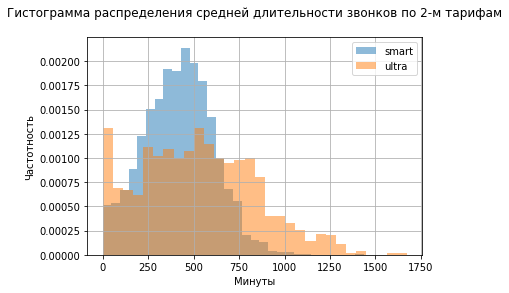

In [45]:
# построим гистограмму распределения средней длительности звонков по 2-м тарифам
revenue.groupby('tariff')['call_sum'].hist(bins=30, legend=True, alpha=0.5, density=True)
plt.title('Гистограмма распределения средней длительности звонков по 2-м тарифам'+ "\n")
plt.xlabel('Минуты')
plt.ylabel('Частотность')

plt.show()

В тарифе smart чаще всего клиенты укладываются в включенные 500 минут тарифа, но есть и такие клиенты, которые превышают лимит звонков по тарифу. Чаще превышают лимит плюсом до 250 минут к основному лимиту.

В тарифе ultra достаточно часто звонками клиенты пользуются по минимому, возможно общаются по средством интернет-звонков. В основном "выговаривают" от 250 до 850 минут и реже сверх 1000 минут. Лимита по звонкам не превышают.

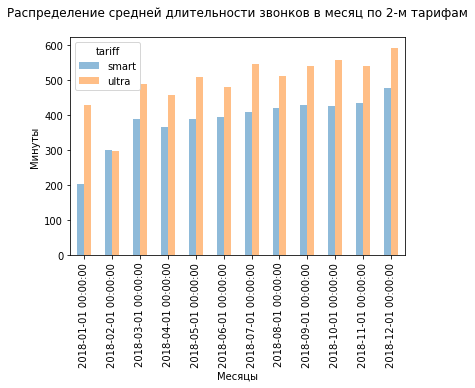

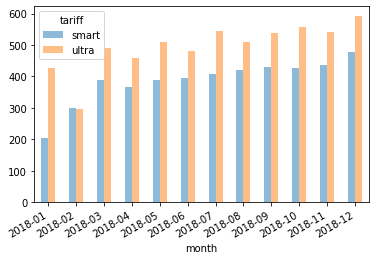

In [46]:
import matplotlib.dates as mdates
import matplotlib.units as muints

# построим распределение средней длительности звонков в месяц по 2-м тарифам
ax = (revenue
 .pivot_table(index='tariff', columns='month', values='call_sum', aggfunc='mean')
 .T
 .plot(kind='bar', alpha=0.5)
)

plt.title('Распределение средней длительности звонков в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Месяцы')
plt.ylabel('Минуты')


plt.show()

data_demo = (revenue
 .pivot_table(index='month', columns='tariff', values='call_sum', aggfunc='mean')
)

data_demo.index = data_demo.index.strftime('%Y-%m')
ax = data_demo.plot(kind='bar', alpha=0.5)

fig = plt.gcf()
fig.autofmt_xdate()

По количеству минут в среднем клиенты тарифа smart не превышают кол-ва минут включенных в тариф.  Клиенты ultra выговаривают не больше 600 минут в месяц в среднем. 

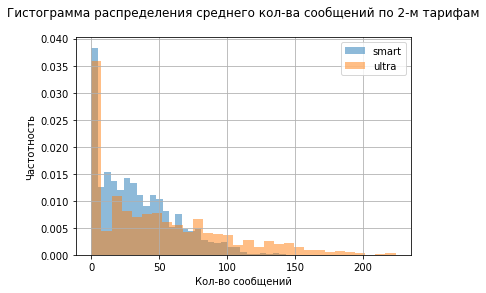

In [47]:
# построим гистограмму распределения среднего кол-ва сообщений по 2-м тарифам
revenue.groupby('tariff')['messages_count'].hist(bins=30, legend=True, alpha=0.5, density=True)
plt.title('Гистограмма распределения среднего кол-ва сообщений по 2-м тарифам'+ "\n")
plt.xlabel('Кол-во сообщений')
plt.ylabel('Частотность')

plt.show()

Из гистограммы видно, что чаще всего клиенты обоих тарифов почти не пользуются смс. Клиенты ultra не превышают лимита, клиенты smart чаще укладываются в лимит, но и есть те кто выходит за 50 сообщений в месяц.

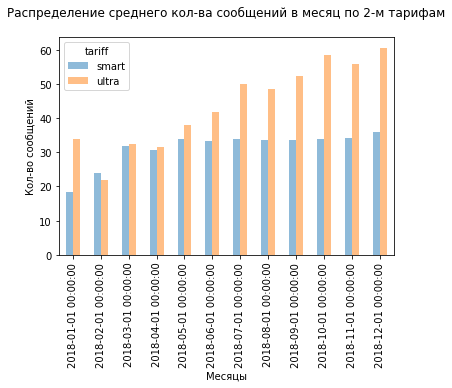

In [48]:
# построим распределение средней кол-ва сообщений в месяц по 2-м тарифам
(revenue
 .pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='mean')
 .T
 .plot(kind='bar', alpha=0.5)
)
plt.title('Распределение среднего кол-ва сообщений в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Месяцы')
plt.ylabel('Кол-во сообщений')

plt.show()

Клиенты smart более стабильны в отправке сообщений, с марта по декабрь чуть больше 30 смс в месяц. Клиенты ultra не так стабильны в отправке смс, рост замечается со второго полугодия и до конца года. Всех меньше отправляют в феврале. Используют не более 6% от включенных в пакет смс.

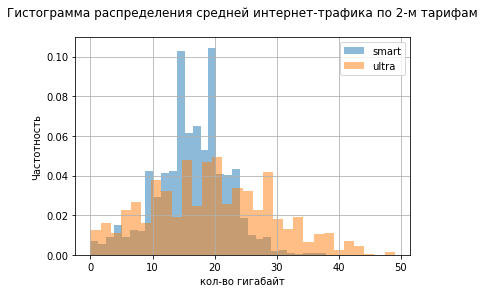

In [49]:
# построим гистограмму распределения среднего интернет-трафика по 2-м тарифам
revenue.groupby('tariff')['mb_sum_inet'].hist(bins=30, legend=True, alpha=0.5, density=True)
plt.title('Гистограмма распределения средней интернет-трафика по 2-м тарифам'+ "\n")
plt.xlabel('кол-во гигабайт')
plt.ylabel('Частотность')

plt.show()

Клиенты smart, часто превышают лимит включенный в тариф по интернет-трафику. Клиенты ultra чаще укладываются в 30гб включенных в тариф, но и есть те, кто превышает лимит.

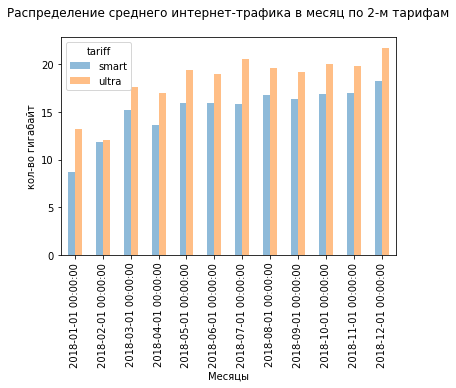

In [50]:
# построим распределение среднего интернет-трафика в месяц по 2-м тарифам
(revenue
 .pivot_table(index='tariff', columns='month', values='mb_sum_inet', aggfunc='mean')
 .T
 .plot(kind='bar', alpha=0.5)
)
plt.title('Распределение среднего интернет-трафика в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Месяцы')
plt.ylabel('кол-во гигабайт')

plt.show()

У обоих тарифов клиенты во втором полугодии более стабильны в использовании интернета.

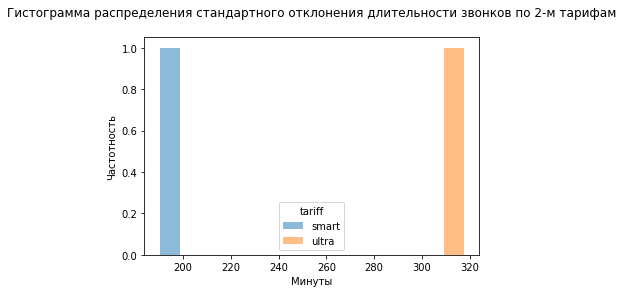

In [51]:
# построим гистограмму распределения стандартного отклонения длительности звонков по 2-м тарифам
(revenue.pivot_table(index='tariff', values='call_sum', aggfunc='std').T
        .plot(kind='hist', alpha=0.5, bins=15))
plt.title('Гистограмма распределения стандартного отклонения длительности звонков по 2-м тарифам'+ "\n")
plt.xlabel('Минуты')
plt.ylabel('Частотность')

plt.show()


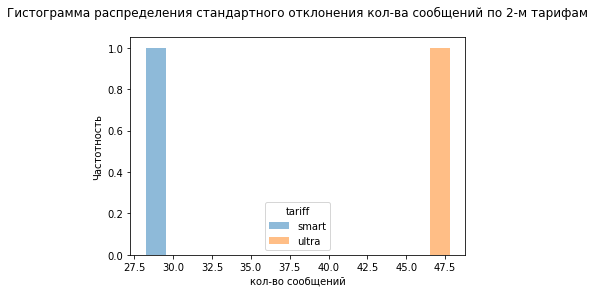

In [52]:
# построим гистограмму распределения стандартного отклонения кол-ва сообщений по 2-м тарифам
(revenue.pivot_table(index='tariff', values='messages_count', aggfunc='std').T
        .plot(kind='hist', alpha=0.5, bins=15))
plt.title('Гистограмма распределения стандартного отклонения кол-ва сообщений по 2-м тарифам'+ "\n")
plt.xlabel('кол-во сообщений')
plt.ylabel('Частотность')

plt.show()


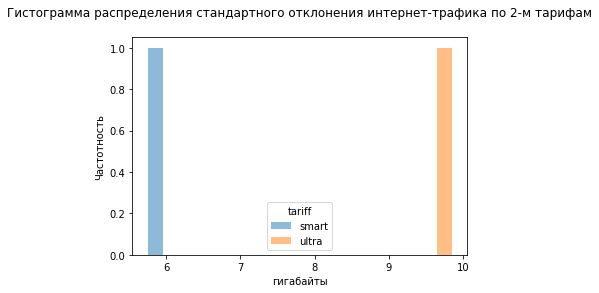

In [53]:
# построим гистограмму распределения стандартного отклонения интернет-трафика по 2-м тарифам
(revenue.pivot_table(index='tariff', values='mb_sum_inet', aggfunc='std').T
        .plot(kind='hist', alpha=0.5, bins=20))
plt.title('Гистограмма распределения стандартного отклонения интернет-трафика по 2-м тарифам'+ "\n")
plt.xlabel('гигабайты')
plt.ylabel('Частотность')

plt.show()


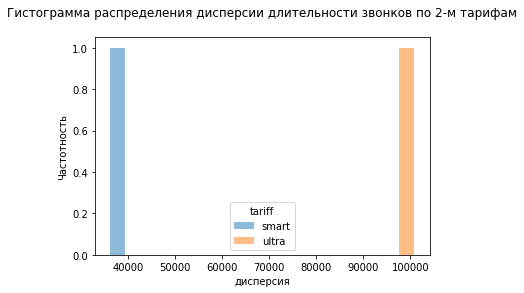

In [54]:
# построим гистограмму распределения дисперсии длительности звонков по 2-м тарифам
(revenue.pivot_table(index='tariff', values='call_sum', aggfunc='var').T
        .plot(kind='hist', alpha=0.5, bins=20))
plt.title('Гистограмма распределения дисперсии длительности звонков по 2-м тарифам'+ "\n")
plt.xlabel('дисперсия')
plt.ylabel('Частотность')

plt.show()

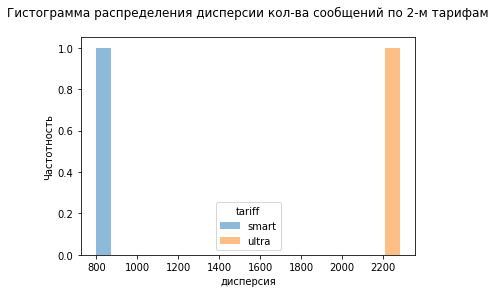

In [55]:
# построим гистограмму распределения дисперсии кол-ва сообщений по 2-м тарифам
(revenue.pivot_table(index='tariff', values='messages_count', aggfunc='var').T
        .plot(kind='hist', alpha=0.5, bins=20))
plt.title('Гистограмма распределения дисперсии кол-ва сообщений по 2-м тарифам'+ "\n")
plt.xlabel('дисперсия')
plt.ylabel('Частотность')

plt.show()

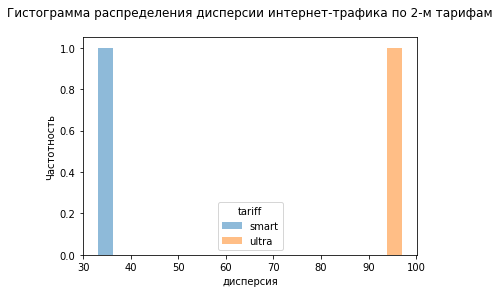

In [56]:
# построим гистограмму распределениядисперсии интернет-трафика  по 2-м тарифам
(revenue.pivot_table(index='tariff', values='mb_sum_inet', aggfunc='var').T
        .plot(kind='hist', alpha=0.5, bins=20))
plt.title('Гистограмма распределения дисперсии интернет-трафика по 2-м тарифам'+ "\n")
plt.xlabel('дисперсия')
plt.ylabel('Частотность')

plt.show()

Дисперсия тарифа ultra больше, чем у клиентов тарифа smart по звонкам, сообщениям и интернет-трафику. Так же она более равномерна, чем у smart.

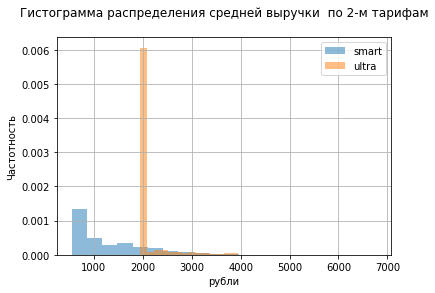

In [57]:
# построим гистограмму распределения средней выручки  по 2-м тарифам
revenue.groupby('tariff')['month_revenue'].hist(bins=20, legend=True, alpha=0.5, density=True)
plt.title('Гистограмма распределения средней выручки  по 2-м тарифам'+ "\n")
plt.xlabel('рубли')
plt.ylabel('Частотность')

plt.show()

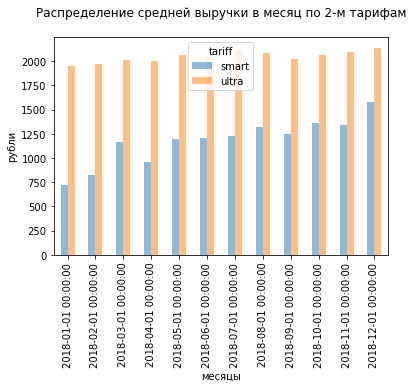

In [58]:
# построим распределение средней выручки в месяц по 2-м тарифам
(revenue
 .pivot_table(index='tariff', columns='month', values='month_revenue', aggfunc='mean')
 .T
 .plot(kind='bar', alpha=0.5)
)
plt.title('Распределение средней выручки в месяц по 2-м тарифам'+ "\n")
plt.xlabel('месяцы')
plt.ylabel('рубли')

plt.show()

### Вывод:

* Клиенты тарифа **ultra** не выходят за пределы своего тарифа по минутам и смс. По интернету выходят, но редко.

* Клиенты тарифа **smart** по кол-ву минут и смс они чаще всего не выходят за пределы тарифа, а вот по объему интернет-трафика почти половина пользователей выходит за лимит.

* Для оператора выгоднее клиенты тарифа ultra, не смотря на то, что они почти недоплачивают за сверхиспользования тарифа, они стабильно приносят компании абоненскую плату почти в 2 раза выше чем клиенты smart с доплатами. Так же их поведение более стабильно, что позволяет спрогнозировать доход от них на более длительный срок.

* Больше всего расходуют из пакета минут, смс и интернет в декабре, всех меньше в январе-феврале.

## Проверка гипотез

**Гипотеза №1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются** 

Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.

Альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны. 

In [59]:
# выборка выручки за месяц тарифа smart
smart = revenue.query('tariff=="smart"')['month_revenue']

In [60]:
# выборка выручки за месяц тарифа ultra
ultra = revenue.query('tariff=="ultra"')['month_revenue']

In [61]:
smart.head()

8     1150.0
9      550.0
10     550.0
11    1150.0
12    1550.0
Name: month_revenue, dtype: float64

In [62]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

#используем метод для проверки гипотезы о равенстве среднего по взятым выборкам
results = st.ttest_ind(smart, ultra)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


**Гипотеза №2: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**

Нулевая гипотеза: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

Альтернативная гипотеза: средняя выручка пользователей из Москвы не равна выручке пользователей из других регионов.

In [63]:
# выборка выручки пользователей из Москвы
msk = revenue.query('city == "Москва"')['month_revenue']

In [64]:
# выборка выручки пользователей из других регионов
region = revenue.query('city != "Москва"')['month_revenue']

In [65]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

#используем метод для проверки гипотезы о равенстве среднего по взятым выборкам
results = st.ttest_ind(msk, region)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 0.5440152911670223
Не получилось отвергнуть нулевую гипотезу


### Вывод:

* По первой гепотезе, P-значение достаточно мало, что даёт основание отвергнуть предположение о равенстве между выручками у разных тарифных планов.
* По второй гепотезе,  P-значение составляет 54,4%, это слишком высокая вероятность для того, чтобы делать выводы о значимом различии между средней выручкой пользователей из Москвы и выручкой пользователей из других регионов.

## Общий вывод:

1. Изучив данные, заменили тип данных у всех столбцов с датами во всех таблицах на datetime.
2. Посчитали для каждого пользователя:
   - количество сделанных звонков и израсходованных минут разговора по месяцам;

   - количество отправленных сообщений по месяцам;

   - объем израсходованного интернет-трафика по месяцам;

   - помесячную выручку с каждого пользователя.
3. Объединили посчитанные данные в одну таблицу revenue
**4. После анализа полученных данных сделали вывод:**
   -  Клиенты тарифа **ultra** не выходят за пределы своего тарифа по минутам и смс. По интернету выходят, но редко.

   - Клиенты тарифа **smart** по кол-ву минут и смс они чаще всего не выходят за пределы тарифа, а вот по объему интернет-трафика почти половина пользователей выходит за лимит.

   - Для оператора выгоднее клиенты тарифа ultra, не смотря на то, что они почти недоплачивают за сверхиспользования тарифа, они стабильно приносят компании абоненскую плату почти в 2 раза выше чем клиенты smart с доплатами. Так же их поведение более стабильно, что позволяет спрогнозировать доход от них на более длительный срок.
   
**5. Мы проверили две гипотезы при помощи ttest.** 
   - **Гипотеза №1**: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются - получив очень маленькое P-значение мы отвергли гипотезу о равенстве средних выручек пользователей разных тарифов.
   - **Гипотеза №2**: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов - получив  P-значение почти 54,4%, мы не отвергли нулевую гипотезу, и предположили, что различия между средней выручкой пользователей из Москвы и выручкой пользователей из других регионов не велико.  